In [56]:
import MDAnalysis as mda

In [57]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [58]:

import os

        
root_directory = "/data3/amiel/notebooks/P454/1stbatch/M2/2pep/"


universes = []

# os.walk parcours les fichiers
for directory_name, subdirectories, files in os.walk(root_directory):
    for file_name in files:
        if file_name.endswith('.tpr'):
            try:
                tpr_file = os.path.join(directory_name, file_name)
                xtc_file = os.path.join(directory_name, file_name.replace('.tpr', '.xtc'))
                
            
                u = mda.Universe(tpr_file, xtc_file)
                
         
                universes.append(u)
                
             
                
            except Exception as e:
                print(f"Erreur lors du chargement du fichier {file_name}: {e}")


In [59]:
universes

[<Universe with 14438 atoms>,
 <Universe with 14438 atoms>,
 <Universe with 14438 atoms>]

In [165]:

m=mda.Universe('prod6667W.tpr','prod6667W.xtc')

In [170]:
pep=m.residues[:31]
membrane=m.select_atoms('resname POPC & POPS')

In [4]:
#w=mda.Universe('prodreplic2m3.tpr','prodreplic2m3.xtc')

In [5]:
u.residues[:31].resnames

array(['ALA', 'SER', 'ALA', 'HIS', 'TRP', 'GLY', 'GLN', 'ARG', 'ALA',
       'LEU', 'GLN', 'GLY', 'ALA', 'GLN', 'ALA', 'VAL', 'ALA', 'ALA',
       'ALA', 'GLN', 'ARG', 'LEU', 'VAL', 'HIS', 'ALA', 'ILE', 'ALA',
       'LEU', 'MET', 'THR', 'GLN'], dtype=object)

In [5]:
u.select_atoms('resname POPC').resids

/softwares/Anaconda3/2021.11/lib/python3.9/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)


array([ 60,  60,  60, ..., 464, 464, 464])

In [14]:
universes[1].residues[:30].resnames

array(['TRP', 'GLY', 'GLN', 'ARG', 'ALA', 'LEU', 'GLN', 'GLY', 'TRP',
       'GLN', 'ALA', 'VAL', 'ALA', 'ALA', 'ALA', 'TRP', 'ARG', 'LEU',
       'VAL', 'HIS', 'ALA', 'ILE', 'ALA', 'LEU', 'MET', 'THR', 'GLN',
       'PHE', 'GLY', 'ARG', 'TRP'], dtype=object)

In [60]:
def z_dis(univ):
    
    membrane=univ.select_atoms('resname POPC & POPS')
    peptide=univ.residues[:30]
    
    z_displacements = []
    time=[]
    
    for ts in univ.trajectory:

        peptide_center_of_mass = peptide.center_of_mass()

        membrane_COM=membrane.center_of_mass()
        z_displacement = abs(peptide_center_of_mass[2]-membrane_COM[2])
        z_displacements.append(z_displacement)
        time.append(univ.trajectory.time)
    z_displacements = np.array(z_displacements)
    z_df=pd.DataFrame(z_displacements,index=time)    
    
    return z_df

In [146]:
big_df=pd.DataFrame()
big_df

""


In [61]:
e=z_dis(universes[0])
f=z_dis(universes[1])
g=z_dis(universes[2])

/softwares/Anaconda3/2021.11/lib/python3.9/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)


In [10]:
a=z_dis(universes[0])
b=z_dis(universes[1])
c=z_dis(universes[2])
u=z_dis(universes[3])
v=z_dis(universes[4])
w=z_dis(universes[5])

/softwares/Anaconda3/2021.11/lib/python3.9/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)


In [12]:
data=[e,f,g]

In [13]:
for i in data:
    print(i.apply(lambda x: x.mean()))
    

0    18.915995
dtype: float64
0    18.922642
dtype: float64
0    22.431734
dtype: float64


In [112]:
for i in data:
    array=np.array(i)
    print(error_estimate(array))
    

(26.958792022702788, 1.031752324768103)
(23.985384911948813, 0.6469306819030329)
(23.67905952068113, 0.30653509989546635)


(0    26.958792
 dtype: float64,
 0   NaN
 dtype: float64)

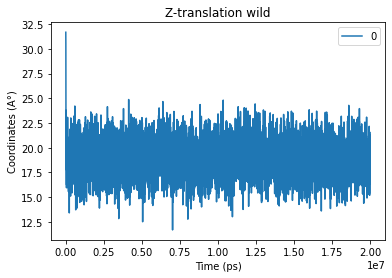

In [62]:

f.plot(title='Z-translation wild')
plt.ylabel('Coordinates (A°)')
plt.xlabel('Time (ps)')
plt.show();

In [176]:
#old version test
z_displacements_mut = []

for ts in m.trajectory:

    peptide_center_of_mass = pep.center_of_mass()

    membrane_COM=membrane.center_of_mass()
    #z_displacement = peptide_center_of_mass[2]-membrane_COM[2]
    z_displacement = abs(peptide_center_of_mass[2]-membrane_COM[2])
    z_displacements_mut.append(z_displacement)


z_displacements_mut = np.array(z_displacements_mut)

In [53]:
#old version test
z_displacements = []

for ts in w.trajectory:

    p454_center_of_mass = p454.center_of_mass()

    membrane_COM=membrane_wild.center_of_mass()
    z_displacement = abs(p454_center_of_mass[2]-membrane_COM[2])
    #z_displacement = p454_center_of_mass[2]-membrane_COM[2]
    z_displacements.append(z_displacement)


z_displacements = np.array(z_displacements)

 # Averages and Error Estimates

In [26]:
def error_estimate(array):
    
    bloc = len(array)/2
    err_est = abs((array[0:int(bloc)].mean()) - (array[int(bloc):-1].mean()))
    return(err_est)

In [17]:
print(error_estimate(e))
#print(error_estimate(z_displacements_mb))

0   NaN
dtype: float64


In [64]:
data=[e,f,g]

In [77]:
dataTM=[a,b,c]
data2pep=[u,v,w]

In [6]:
import numpy as np

# Chemin du fichier

import os

        
root_directory = "/data3/amiel/P454/martini2/1stbatch/2_peptides/POPC_POPS/prodrome"


ee_values = []

# os.walk parcours les fichiers
for directory_name, subdirectories, files in os.walk(root_directory):
    for file_name in files:
        if file_name.startswith('err'):
            file_path = os.path.join(directory_name, file_name)
            try:
                with open(file_path, 'r') as file:
                    for line in file:
        # Si la ligne commence par "@ s1 legend "ee ", extraire la valeur
                        if line.startswith('@ s1 legend "ee '):
                            ee_value = float(line.split('"')[2])
                            ee_values.append(ee_value)

# Vérifier si des valeurs "ee" ont été trouvées
                if ee_values:
    # Utiliser NumPy pour effectuer des opérations sur les valeurs si nécessaire
                    ee_array = np.array(ee_values)
                    average_ee = np.mean(ee_array)
                    print(f'The average "ee" value is: {average_ee}')
                else:
                    print('No "ee" values found in the file.')

                
                
            except Exception as e:
                print(f"Erreur lors du chargement du fichier {file_name}")






Erreur lors du chargement du fichier errest.xvg


In [52]:
import numpy as np
import os

root_directory = "/data3/amiel/P454/martini2/1stbatch/2_peptides/POPC_POPS/prodrome"
ee_values = []


for directory_name, subdirectories, files in os.walk(root_directory):
    for file_name in files:
        if file_name.startswith('err'):
            file_path = os.path.join(directory_name, file_name)
            try:
                with open(file_path, 'r') as file:
                    file_content = file.read()
                ee_match = re.search(r'@ s1 legend "ee (\d+\.\d+)"', file_content)
                if ee_match:
                    ee_value = float(ee_match.group(1))
                    ee_values.append(ee_value)
                    print(f'The "ee" value is: {ee_value}')
                else:
                    print('No "ee" value found in the file.')

            except Exception as e:
                print(f"Erreur lors du chargement du fichier {file_name}")



The "ee" value is: 0.00577899
The "ee" value is: 0.0042322
The "ee" value is: 0.12959


In [53]:
ee_values

[0.00577899, 0.0042322, 0.12959]

In [23]:
%%bash
cd /data3/amiel/P454/martini2/1stbatch/2_peptides/POPC_POPS/prodrome/
file_path="/data3/amiel/P454/martini2/1stbatch/2_peptides/POPC_POPS/prodrome/"



In [24]:
pwd

'/data3/amiel/notebooks'

In [40]:
ee_values = []
file_path="/data3/amiel/P454/martini2/1stbatch/2_peptides/POPC_POPS/prodrome/replic1/errest.xvg"
with open(file_path, 'r') as file:
    for line in file:
        if line.startswith('@ s1 legend "ee '):
            parts = line.split('"')
            if len(parts) > 2 and parts[2].strip():  # Vérifiez si la partie après le deuxième guillemet n'est pas une chaîne vide
                ee_value = float(parts[2])
                ee_values.append(ee_value)


In [45]:
import re

# Read the content of the file
  # Replace with the actual file path
with open(file_path, 'r') as file:
    file_content = file.read()

# Use regular expression to find the value associated with "ee"
ee_match = re.search(r'@ s1 legend "ee (\d+\.\d+)"', file_content)

# Check if the match is found
if ee_match:
    ee_value = float(ee_match.group(1))
    print(f'The "ee" value is: {ee_value}')
else:
    print('No "ee" value found in the file.')


The "ee" value is: 0.0042322


In [22]:
z=np.array(e)
print(error_estimate(z))

0.17823966369225985


In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Générer des données aléatoires (à remplacer par vos propres données)


# Fonction pour calculer les moyennes par blocs
def block_average(data, block_size):
    num_blocks = len(data) // block_size
    block_means = [np.mean(data[i * block_size:(i + 1) * block_size]) for i in range(num_blocks)]
    return block_means

# Calcul des moyennes par blocs
block_size = 10  # Taille des blocs
block_means = block_average(data, block_size)

# Calcul de la moyenne globale et de l'écart-type pour l'estimation d'erreur
global_mean = np.mean(block_means)
global_std = np.std(block_means, ddof=1)  # Utilisation de ddof=1 pour une estimation non biaisée de l'écart-type

# Création du graphique avec Matplotlib
plt.figure(figsize=(8, 6))

# Tracé des données
plt.scatter(np.arange(len(block_means)), block_means, label='Block Averages')

# Barres d'erreur pour les estimations d'erreur
plt.errorbar(0, global_mean, yerr=global_std, fmt='o', color='red', label='Global Mean ± Error')

plt.xlabel('Block Index')
plt.ylabel('Block Average')
plt.title('Block Averaging with Error Estimates')
plt.legend()
plt.grid(True)
plt.show()


In [155]:
def block_average(data, block_size):
    num_blocks = len(data) // block_size
    data=np.array(data)
    block_means = [np.mean(data[i * block_size:(i + 1) * block_size]) for i in range(num_blocks)]
    return block_means

In [1]:
from statsmodels.graphics.tsaplots import plot_acf


plot_acf(e[0])
plt.show();

NameError: name 'e' is not defined

In [158]:
len(block_average(e,10))

1000

In [82]:
err_values=[]
for i in dataTM:
    
    err_values.append(np.std(i[0]))
    
print(err_values)

[1.32921073729896, 1.3364074962002164, 1.3363654780440495]


In [23]:
for i in data:
    i=np.array(i)
    f= error_estimate(i)
    print(f)

0.17823966369225985
0.1508077649720363
0.8500102304226687


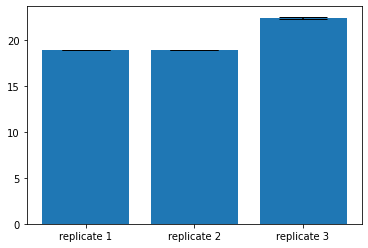

In [68]:
mean_values=[]
err_values=[]
for df in data:
    mean_z = df[0].mean()
    mean_values.append(mean_z)

# Tracé du graphique
#plt.figure(figsize=(8, 6))
plt.bar([f"replicate {i+1}" for i in range(len(data))], mean_values,yerr=ee_values,capsize=24)
plt.show();


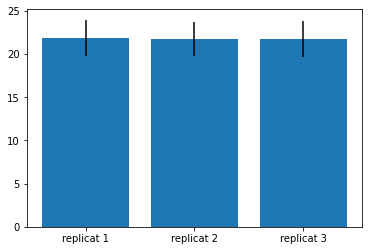

In [20]:
mean_values=[]
err_values=[]
for df in data:
    mean_z = df[0].mean()
    mean_values.append(mean_z)
    df=np.array(df)
    err_values.append(np.std(df))
# Tracé du graphique
#plt.figure(figsize=(8, 6))
plt.bar([f"replicat {i+1}" for i in range(len(data))], mean_values,yerr=err_values)
plt.show();


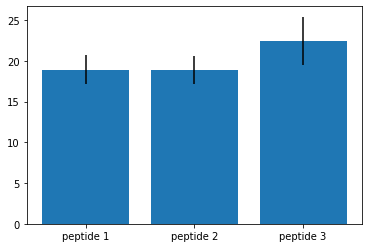

In [173]:

mean_values=[]
err_values=[]
for df in data2pep:
    mean_z = df[0].mean()
    mean_values.append(mean_z)
    df=np.array(df)
    err_values.append(np.std(df))
    
# Tracé du graphique
#plt.figure(figsize=(8, 6))
plt.bar([f"peptide {i+1}" for i in range(len(data2pep))], mean_values,yerr=err_values)

plt.show();


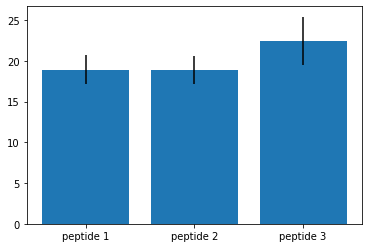

In [79]:

mean_values=[]
err_values=[]
for df in data2pep:
    mean_z = df[0].mean()
    mean_values.append(mean_z)
    err_values.append(np.std(df[0],ddof=1))
# Tracé du graphique
#plt.figure(figsize=(8, 6))
plt.bar([f"peptide {i+1}" for i in range(len(data2pep))], mean_values,yerr=err_values)

plt.show();


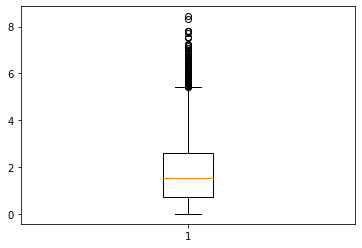

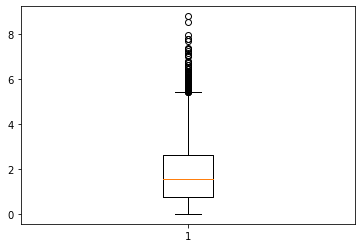

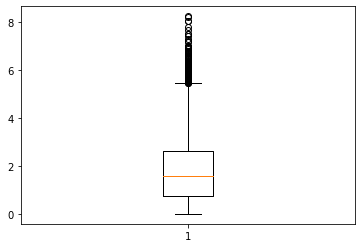

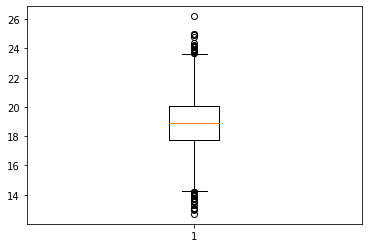

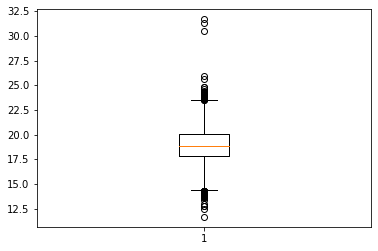

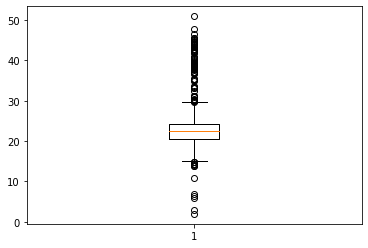

In [88]:
for i,df in enumerate(data):
    plt.figure()
    plt.boxplot(data[i])


plt.show();

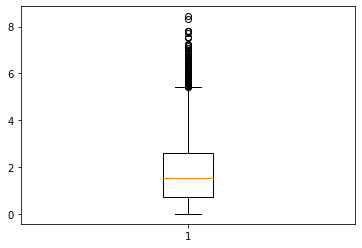

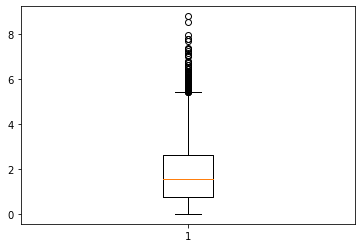

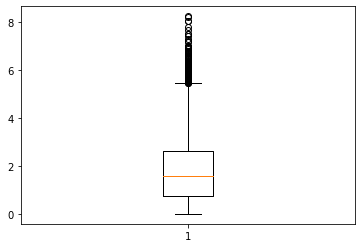

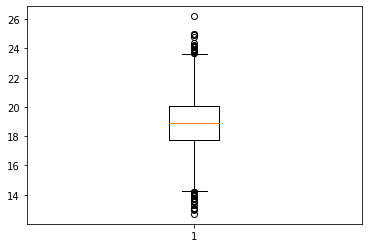

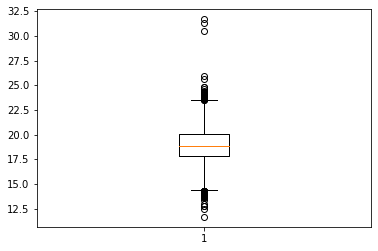

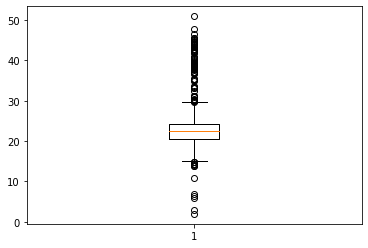

In [16]:
for i,df in enumerate(data):
    plt.figure()
    plt.boxplot(data[i])


plt.show();

In [178]:
z_displacements_mut

array([18.68720688, 16.88221852, 17.31511397, ..., 19.09015044,
       19.03608042, 21.95179202])

In [180]:

time1 = []
protein = m.select_atoms("protein")
for ts in m.trajectory:
    time1.append(m.trajectory.time)


In [181]:
df_mut=pd.DataFrame(z_displacements_mut,index=time1)

In [203]:
df_mut

,0
0.0,18.687207
2000.0,16.882219
4000.0,17.315114
6000.0,17.362921
8000.0,18.176737
...,...
19992000.0,19.864732
19994000.0,20.122141
19996000.0,19.090150
19998000.0,19.036080


In [1]:
err_values=np.std(df_mut[0])

plt.figure(figsize=(1, 7))
mean_z=df_mut[0].mean()
plt.bar(['mut6667W'],mean_z,yerr=err_values)
plt.show();

NameError: name 'np' is not defined

In [30]:
z_mut=z_mut.iloc[:2500]

In [31]:
z_df=z_df.iloc[:2500]

In [47]:
z_trans_mb=pd.DataFrame(z_mut,index=time)
rolling_z = pd.DataFrame(z_mut.rolling(50).mean(),index=time)
z_trans_mb.plot(title='Z-translation mutant')
plt.ylabel('Coordinates (A°)')
plt.xlabel('Time (ps)')
z_trans=pd.DataFrame(z_df,index=time1)
z_trans.plot(title='Z-translation wild')
plt.ylabel('Coordinates (A°)')
plt.xlabel('Time (ps)')
plt.show();

NameError: name 'z_mut' is not defined

In [ ]:
z_displacements = []

for ts in u.trajectory:

    peptide_center_of_mass = pep.center_of_mass()

    membrane_COM=membrane_wild.center_of_mass()
    z_displacement = peptide_center_of_mass[2]
    z_displacements.append(z_displacement)


z_displacements = np.array(z_displacements)

In [79]:
z_mut=z_mut.rename(columns={0:'dis'})


Exception ignored in: <function ReaderBase.__del__ at 0x7f6a5ed4e790>
Traceback (most recent call last):
  File "/softwares/Anaconda3/2021.11/lib/python3.9/site-packages/MDAnalysis/coordinates/base.py", line 2152, in __del__
    self.close()
  File "/softwares/Anaconda3/2021.11/lib/python3.9/site-packages/MDAnalysis/coordinates/XDR.py", line 179, in close
    self._xdr.close()
AttributeError: 'XTCReader' object has no attribute '_xdr'


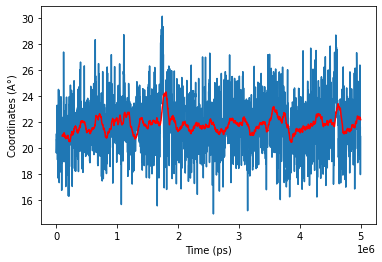

In [84]:
#z_trans_mb=pd.DataFrame(z_mut,index=time)
#rolling_z = pd.DataFrame(z_mut.rolling(50).mean(),index=time)
rolling_mut=z_mut.rolling(50).mean()
plt.plot(z_mut['dis'])
plt.plot(rolling_mut, color = "red")

plt.ylabel('Coordinates (A°)')
plt.xlabel('Time (ps)')

plt.show();

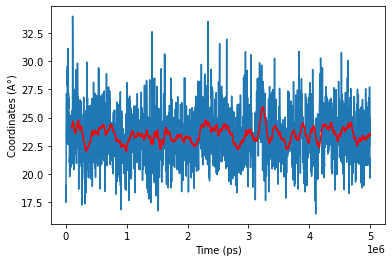

In [83]:
#z_trans=pd.DataFrame(z_df,index=time1)
rolling_zdf=z_df.rolling(50).mean()

plt.plot(z_df)
plt.plot(rolling_zdf['dis'], color = "red")

plt.ylabel('Coordinates (A°)')
plt.xlabel('Time (ps)')

plt.show();

In [ ]:
z_trans_mb

In [ ]:
rolling_z

In [63]:
z_df=z_df.rename(columns={0:'dis'})

In [95]:
print(u.dimensions)

[120. 120. 120.  90.  90.  90.]


In [96]:
print(w.dimensions)

[121.8443 121.8443 109.4176  90.      90.      90.    ]


In [91]:
from MDAnalysis.analysis import distances

# Calculer la distance entre le centre de masse et l'extrémité de la boîte
distance = distances.distance_array(membrane_COM, u.dimensions)



ValueError: distance_array(): configuration.shape must be (3,) or (n, 3), got (6,).